In [12]:
from lmfit import model
import numpy as np
import matplotlib.pyplot as plt

def calc_squeez_parameter(dB):
    return np.log(10**(dB/10))/2


def s(dB):
    return np.sqrt(10**(-dB/10))

# setup model

def exp_decay_radim(x, T, amp, offset, dB, alpha0):
    # xi = calc_squeez_parameter(dB)
    # s = np.exp(-xi)
    
    return offset-amp*np.exp(-x*s(dB)/(2*T)*alpha0**2)

def exp_decay_radim_s2(x, T, amp, offset, dB, alpha0):
    # xi = calc_squeez_parameter(dB)
    # s = np.exp(-xi)
    return offset-amp*np.exp(-x*s(dB)**2/(2*T)*alpha0**2)

# load Data

$$ e^{-\frac{\tau s}{2T_1}|\alpha|^2}$$

In [16]:
# load data

vac_scale = 0.883
bootstrap_data = np.load('data/bootstrap_data.npy')[0]/vac_scale
bootstrap_error_bars = np.load('data/bootstrap_data.npy')[1]/vac_scale

# normalize data and add point for away that is zero
y_list = []
for i,data in enumerate(bootstrap_data):
       y_list.append( np.concatenate((-data/np.min(data), np.array([0], dtype = np.float64))))
       
decay_times = np.array([  1.,  10.,  20.,  35.,  50.,  70., 100.,
       150., 200.])
x = np.concatenate((decay_times, np.array([10000], dtype = np.float64)))


# setup model

In [17]:
# setup fit model
from lmfit import Model


gmodel = Model(exp_decay_radim_s2)
print(f'parameter names: {gmodel.param_names}')
print(f'independent variables: {gmodel.independent_vars}')

gmodel.set_param_hint('T', value=200)
gmodel.set_param_hint('amp', value=1, vary = False)
gmodel.set_param_hint('offset', value=0, vary = False)
gmodel.set_param_hint('dB', value=0, vary = False)
gmodel.set_param_hint("alpha0", value = 3.47, vary = False)
params = gmodel.make_params()

params

parameter names: ['T', 'amp', 'offset', 'dB', 'alpha0']
independent variables: ['x']


name,value,initial value,min,max,vary
T,200.000000,None,-inf,inf,True
amp,1.00000000,None,-inf,inf,False
offset,0.00000000,None,-inf,inf,False
dB,0.00000000,None,-inf,inf,False
alpha0,3.47000000,None,-inf,inf,False


[[Model]]
    Model(exp_decay_radim_s2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 10
    # variables        = 1
    chi-square         = 0.00257403
    reduced chi-square = 2.8600e-04
    Akaike info crit   = -80.6486579
    Bayesian info crit = -80.3460728
[[Variables]]
    T:       266.446636 +/- 6.05133902 (2.27%) (init = 200)
    amp:     1 (fixed)
    offset:  0 (fixed)
    dB:      0 (fixed)
    alpha0:  3.47 (fixed)


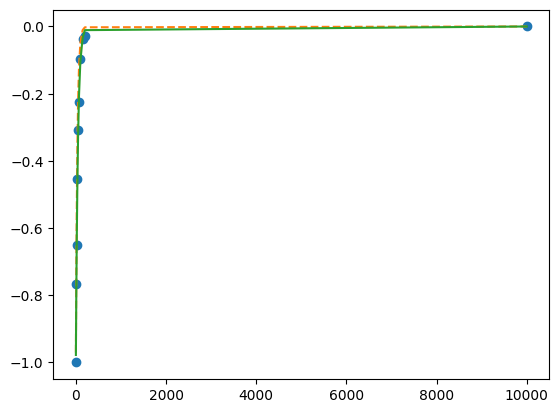

[266.4466360778605]
[[Model]]
    Model(exp_decay_radim_s2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 11
    # data points      = 10
    # variables        = 1
    chi-square         = 0.01136145
    reduced chi-square = 0.00126238
    Akaike info crit   = -65.8011391
    Bayesian info crit = -65.4985540
[[Variables]]
    T:       259.645211 +/- 11.6103658 (4.47%) (init = 200)
    amp:     1 (fixed)
    offset:  0 (fixed)
    dB:      3 (fixed)
    alpha0:  3.39009 (fixed)


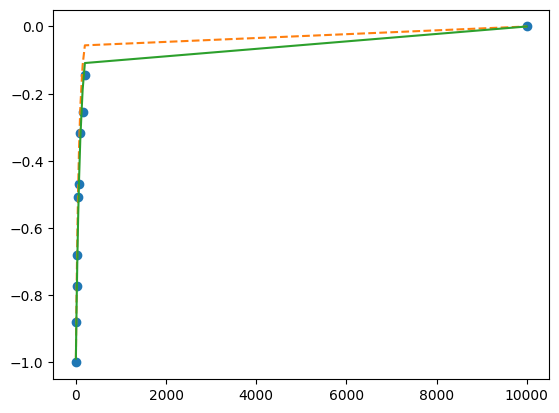

[266.4466360778605, 259.6452114826735]
[[Model]]
    Model(exp_decay_radim_s2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 10
    # variables        = 1
    chi-square         = 0.00711878
    reduced chi-square = 7.9098e-04
    Akaike info crit   = -70.4760348
    Bayesian info crit = -70.1734497
[[Variables]]
    T:       236.847467 +/- 8.85755095 (3.74%) (init = 200)
    amp:     1 (fixed)
    offset:  0 (fixed)
    dB:      6.7 (fixed)
    alpha0:  3.806385 (fixed)


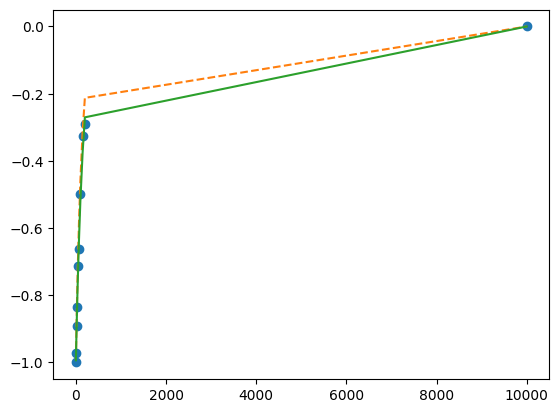

[266.4466360778605, 259.6452114826735, 236.84746722942785]
[[Model]]
    Model(exp_decay_radim_s2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 10
    # variables        = 1
    chi-square         = 0.01339050
    reduced chi-square = 0.00148783
    Akaike info crit   = -64.1579510
    Bayesian info crit = -63.8553660
[[Variables]]
    T:       223.125761 +/- 11.4696150 (5.14%) (init = 200)
    amp:     1 (fixed)
    offset:  0 (fixed)
    dB:      7.6 (fixed)
    alpha0:  4.078016 (fixed)


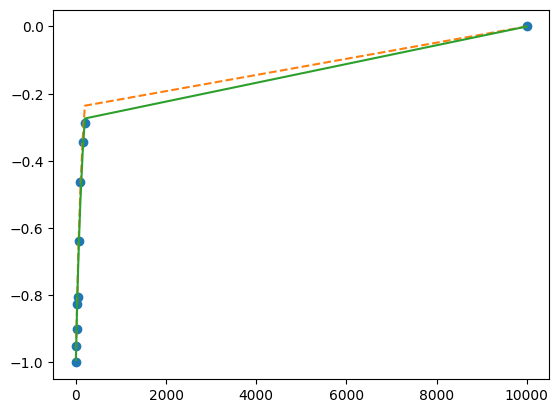

[266.4466360778605, 259.6452114826735, 236.84746722942785, 223.12576128655962]


In [18]:
dB_values = [0, 3, 6.7, 7.6]
alpha0_exp = np.array([3.47      , 3.39009011, 3.8063846 , 4.07801596])*1 # see appendix
T_values = []
for i, y in enumerate(y_list):
    params["dB"].value = dB_values[i]
    params["alpha0"].value = alpha0_exp[i]
    
    result = gmodel.fit(y, params, x=x)
    T_values.append(result.values["T"])
    print(result.fit_report())
    
    plt.plot(x, y, 'o')
    plt.plot(x, result.init_fit, '--', label='initial fit')
    plt.plot(x, result.best_fit, '-', label='best fit')
    plt.plot()
    # plt.plot(x_test,exp_decay_radim_s2(x_test, T = 15.5333556 , amp =0.3579025, offset=0, dB = 6.7) )
    plt.show()
    
    print(T_values)
        

In [123]:
result.best_fit

array([-3.48854351e-01, -2.84341583e-01, -2.26552848e-01, -1.61125118e-01,
       -1.14592705e-01, -7.27470300e-02, -3.67961781e-02, -1.18154007e-02,
       -3.79397265e-03, -4.84647597e-11])

## Appendix

### Ideal theoretical alphas

In [160]:
dBs = np.array([0, 3, 6.7, 7.6])
zs = calc_squeez_parameter(-dBs)
alpha0 = 1.8
gammas = alpha0*(np.cosh(zs) + np.sinh(zs))
gammas


array([1.8       , 1.27430241, 0.83228584, 0.75036489])

### alpha0 for experimental Data
Used the extracted peak positions together with the respective compression value to find the corresponding alpha0

In [165]:
gammas_exp = np.array([3.47, 2.4, 1.76, 1.7])
alpha0_exp = gammas_exp/(np.cosh(zs) + np.sinh(zs))
alpha0_exp


array([3.47      , 3.39009011, 3.8063846 , 4.07801596])